# Loanword analysis using Markov language model  
### with Kneser Ney smoothing 
### Files from WOLD  - forms, segmented forms, indicator of loan words  
## Requires NLTK3.5  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Do this once in the kernel.
import sys
sys.path.append('code')

# Set to automatically reload.
%load_ext autoreload
%autoreload 2

In [2]:
# List of study languages:
languages = ['English', 'Hup', 'ImbaburaQuechua', 'Mapudungun', 'Qeqchi', 'Wichi']
# English for development and the Latin American languages for strong regioinal interest.

In [3]:
# Compile code for MarkovCharLM...
import py_compile
py_compile.compile('code/utility_functions.py')
py_compile.compile('code/markov_char_lm.py')
py_compile.compile('code/markov_model_analysis.py')

'code/__pycache__/markov_model_analysis.cpython-38.pyc'

In [4]:
from utility_functions import *
from markov_char_lm import MarkovCharLM
from markov_model_analysis import analyze_language_word_distributions
from markov_model_analysis import analyze_language_word_distributions_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_dual_basis
from markov_model_analysis import k_fold_entropy_for_language

# Randomization test for distribution differences  
## Markov model entropies calculated from undifferentiated (entire) word table  
1. Fit Markov model to undifferentiated sample or entire table.  
2. Examine distributiona of native and loan words.  
3. Randomization test for native versus loan word distributional differences.
    1. Calculate decision statistic for 'true' vector of native versus loan.  
    2. Perform n randomizations of vector which arbitrarily designates native versus loan.
        1. calculate statistic for each randomization.
    3. Determine empirical probability distribution of statistic and probability of original decision statistic.  
        

Language=English


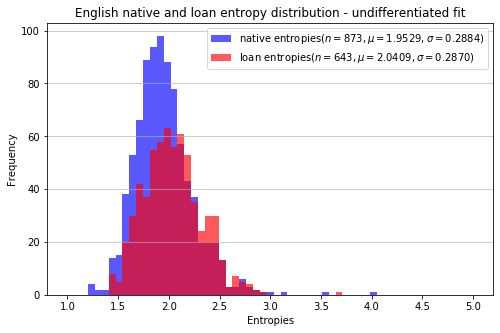

prob (ks stat >= 0.16808) = 0.00010


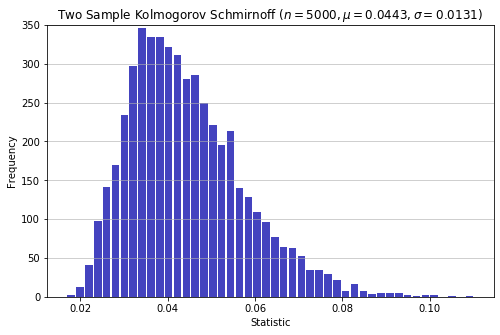

Language=Hup


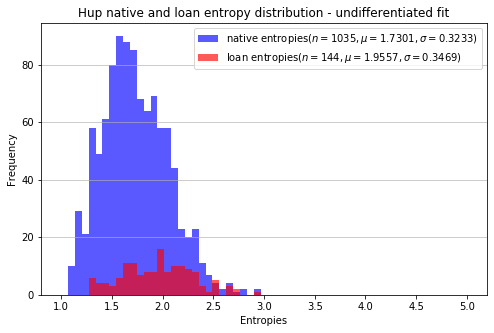

prob (ks stat >= 0.29571) = 0.00010


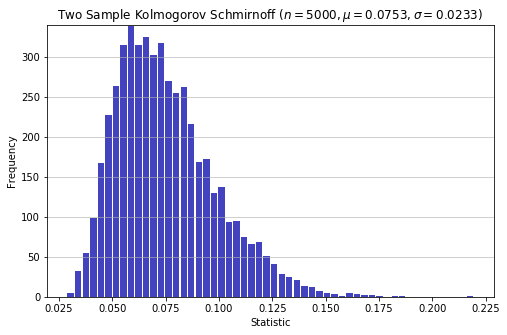

Language=ImbaburaQuechua


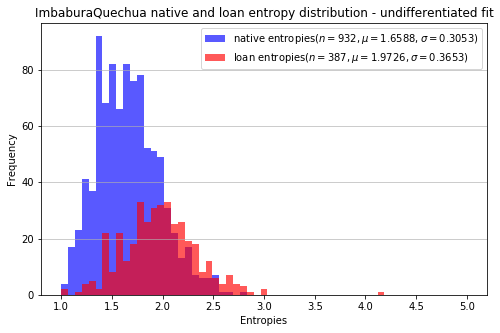

prob (ks stat >= 0.41148) = 0.00010


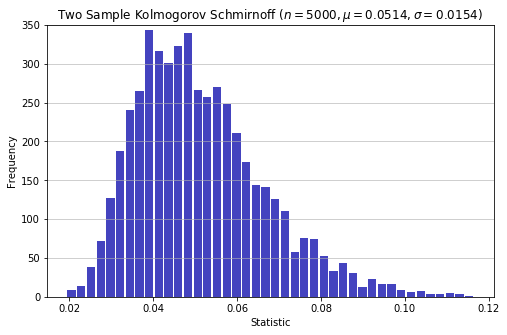

Language=Mapudungun


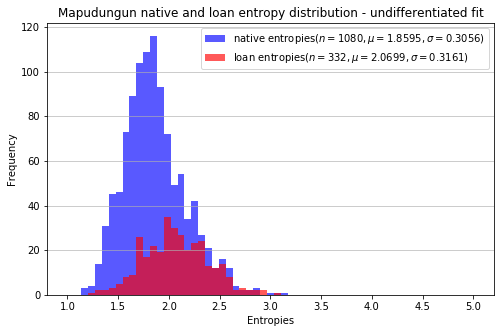

prob (ks stat >= 0.33744) = 0.00010


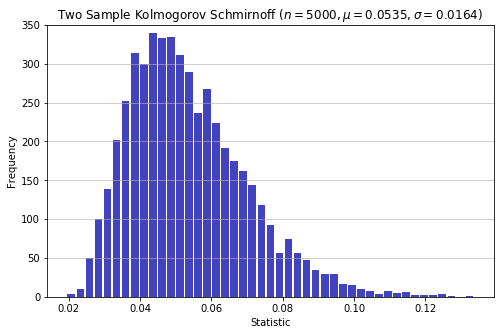

Language=Qeqchi


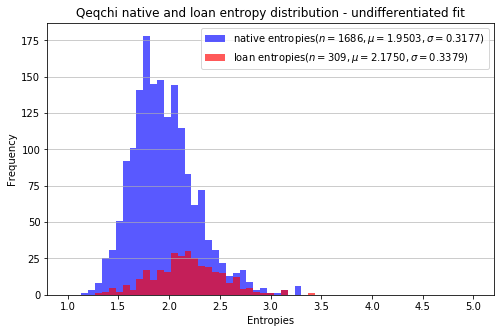

prob (ks stat >= 0.32823) = 0.00010


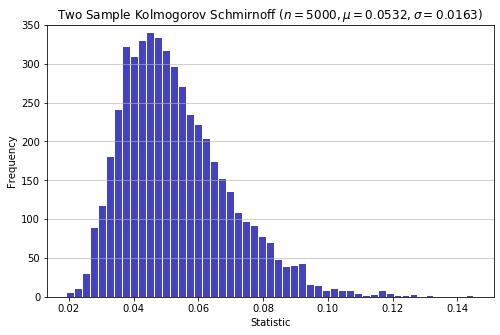

Language=Wichi


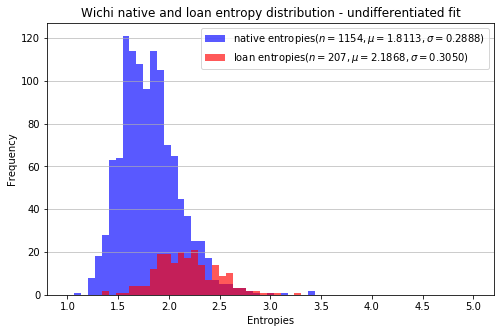

prob (ks stat >= 0.52453) = 0.00010


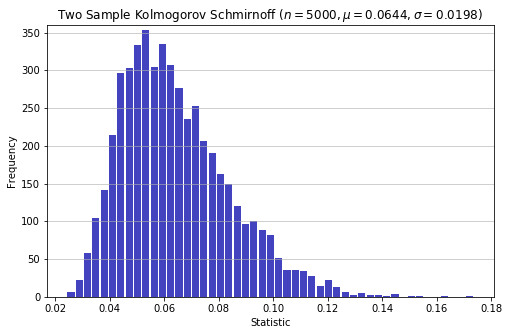

In [7]:
# Test for distributional differences - Based on formchars
# Based on undifferentiated table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions(l, form='formchars', test='ks', n=5000)

Language=English


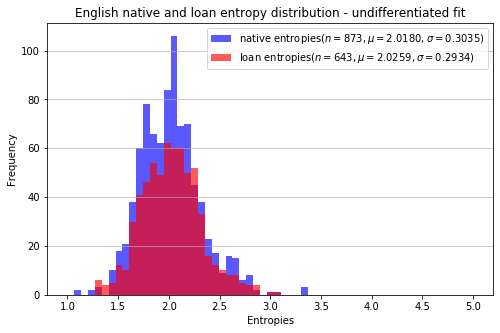

prob (ks stat >= 0.04214) = 0.49220


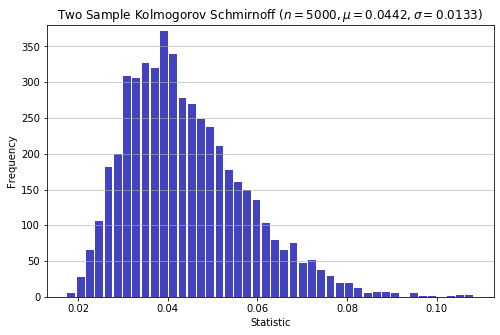

Language=Hup


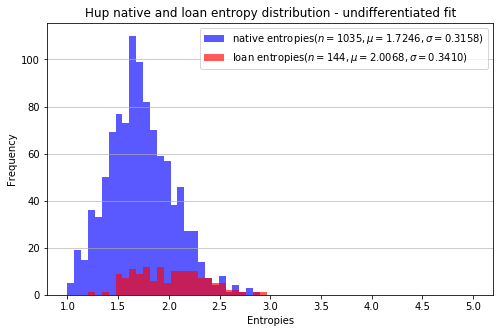

prob (ks stat >= 0.33364) = 0.00010


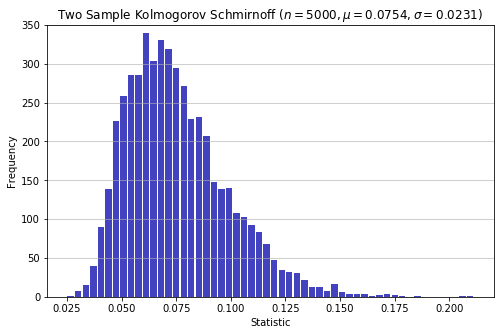

Language=ImbaburaQuechua


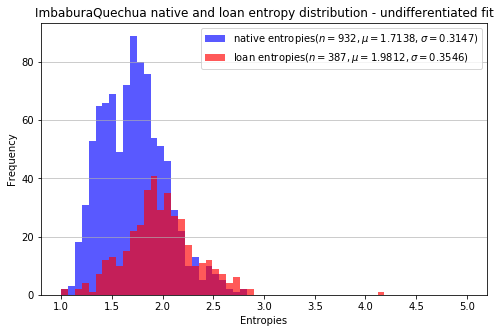

prob (ks stat >= 0.36392) = 0.00010


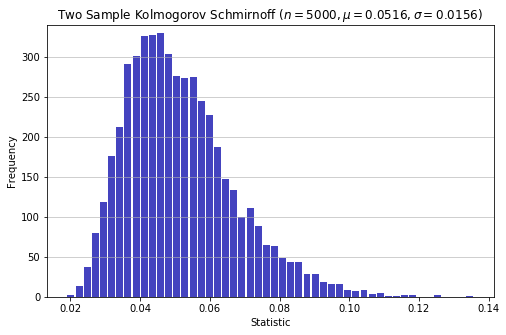

Language=Mapudungun


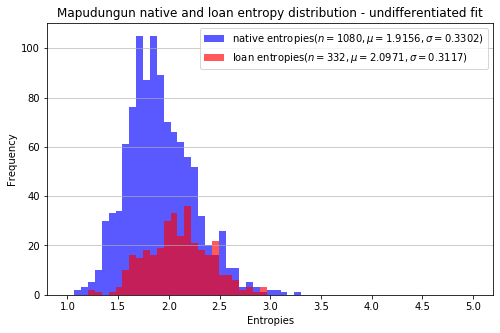

prob (ks stat >= 0.29208) = 0.00010


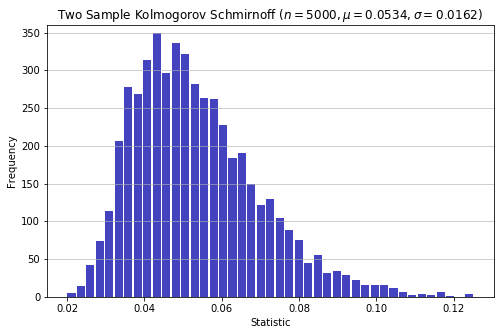

Language=Qeqchi


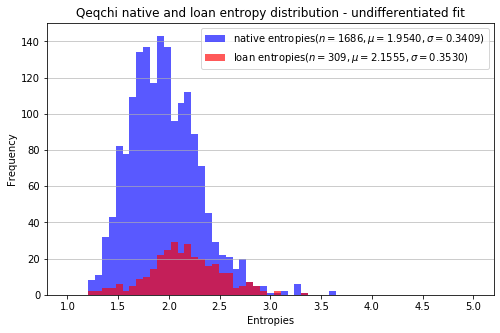

prob (ks stat >= 0.28575) = 0.00010


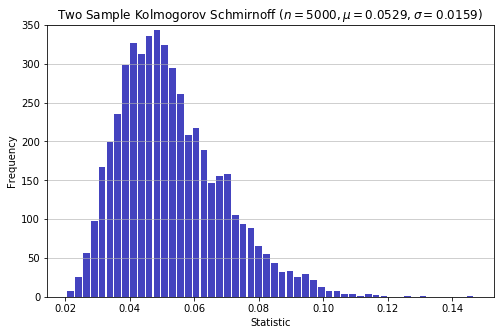

Language=Wichi


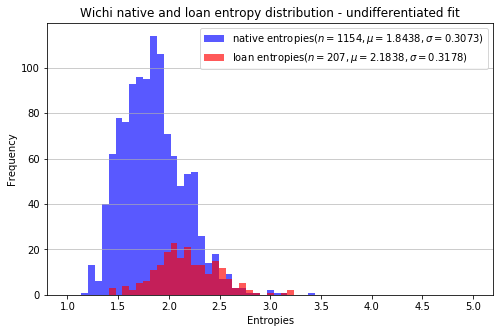

prob (ks stat >= 0.47015) = 0.00010


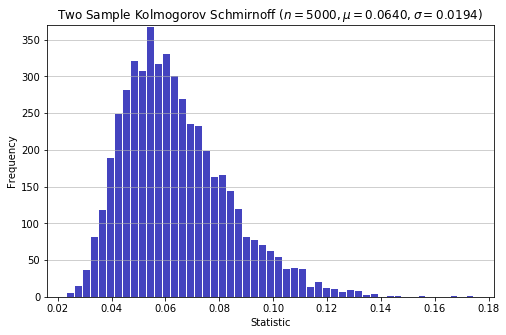

In [8]:
# Test for distributional differences - Based on segmented IPA (segments)
# Based on undifferentiated table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions(l, form='segments', test='ks', n=5000)

Language=English, form=scas


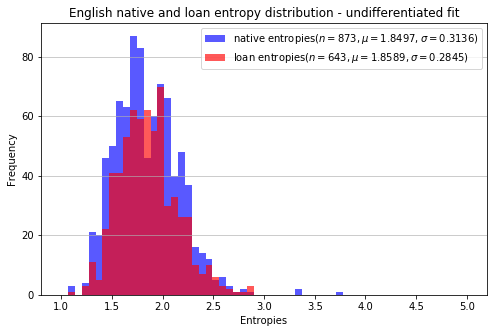

prob (ks stat >= 0.05185) = 0.26945


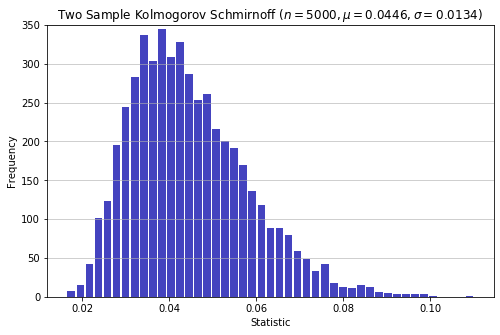

Language=Hup, form=scas


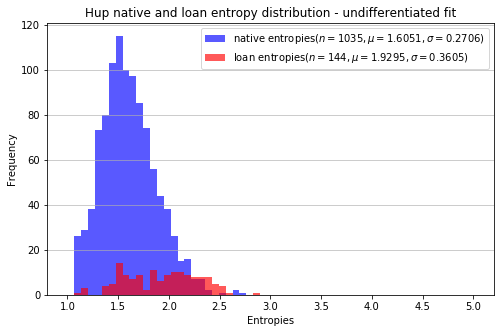

prob (ks stat >= 0.42114) = 0.00010


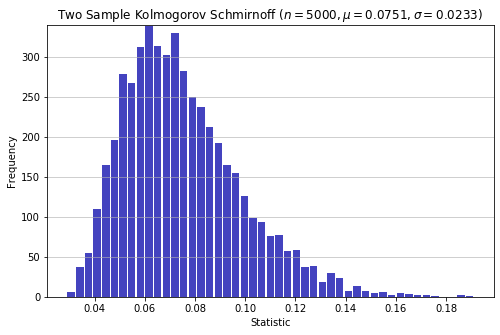

Language=ImbaburaQuechua, form=scas


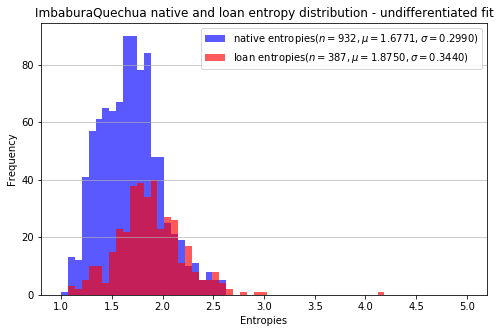

prob (ks stat >= 0.28408) = 0.00010


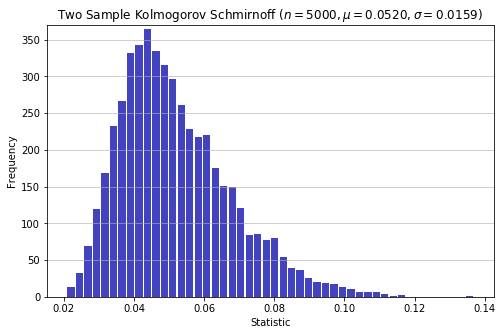

Language=Mapudungun, form=scas


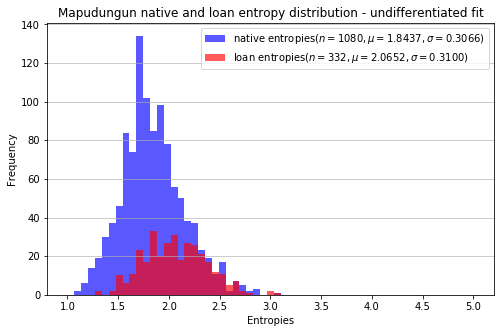

prob (ks stat >= 0.31353) = 0.00010


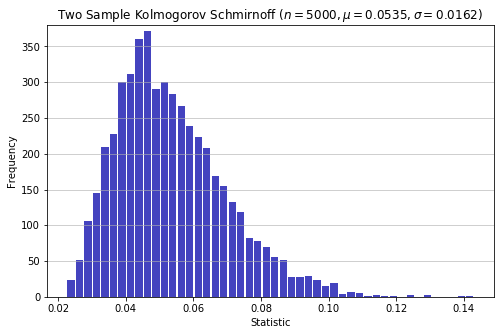

Language=Qeqchi, form=scas


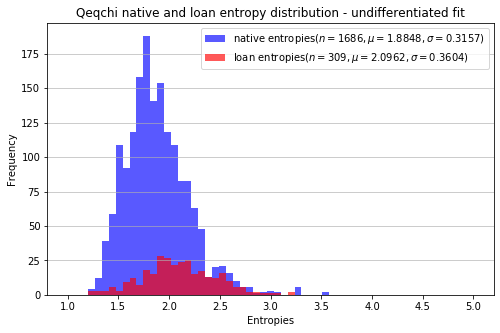

prob (ks stat >= 0.31501) = 0.00010


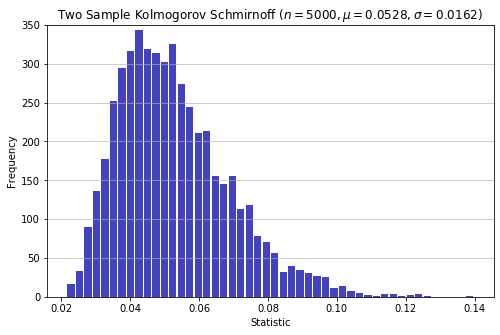

Language=Wichi, form=scas


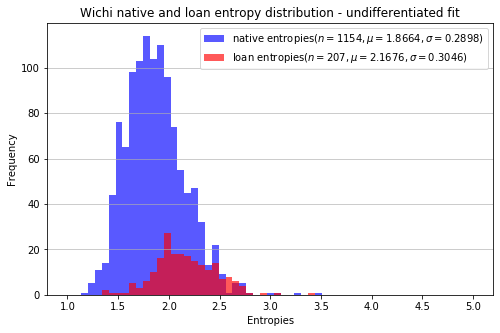

prob (ks stat >= 0.43982) = 0.00010


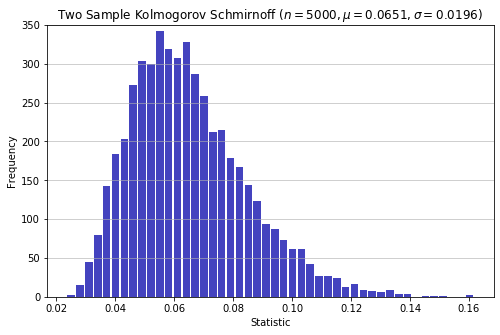

In [5]:
# Test for distributional differences - Based on segmented IPA (segments)
# Based on undifferentiated table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions(l, form='scas', test='ks', n=5000)

# Randomization tests for distribution differences  
## Constructs native Markov models for each randomization  
- Repeated estimation of model and with random selector - very compute intensive
    - Correct approach in that it incoporates the learning bias.
    - Reduced repetitions to 1000 due to compute time.  

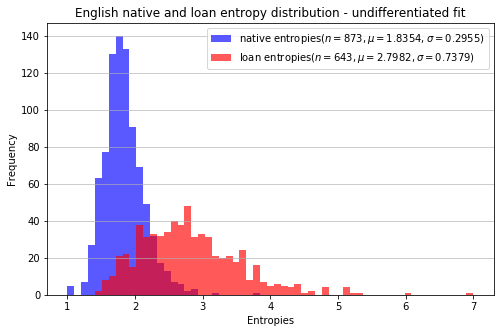

prob (stat >= 0.6870465084378602 ) = 0.0004995004995005381


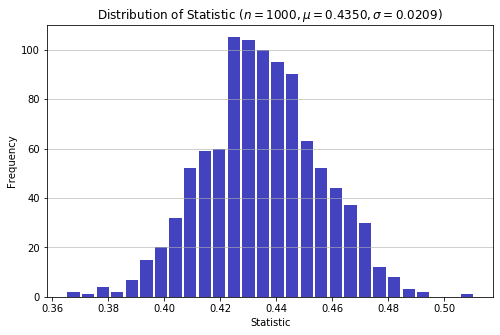

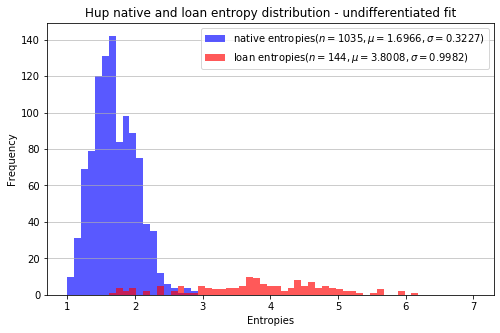

prob (stat >= 0.8855676328502415 ) = 0.0004995004995005381


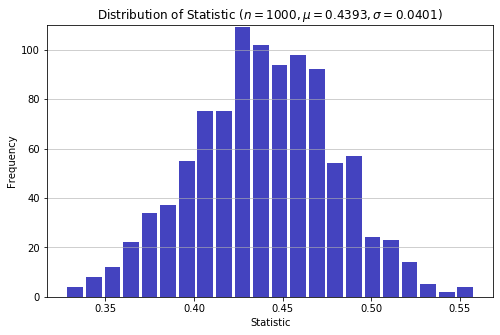

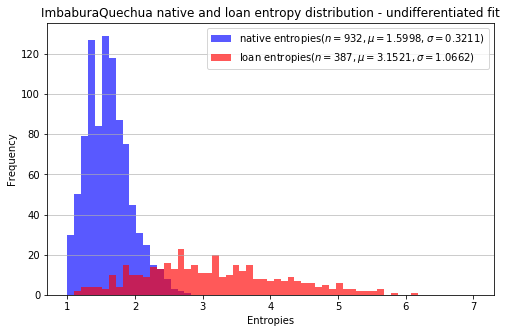

prob (stat >= 0.7656702265695179 ) = 0.0004995004995005381


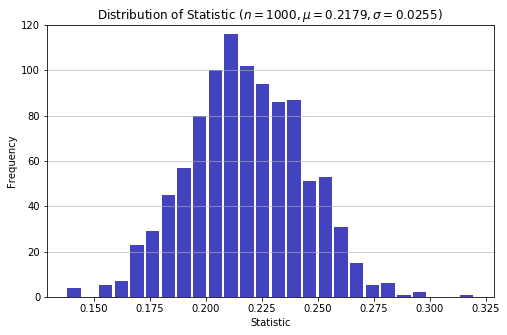

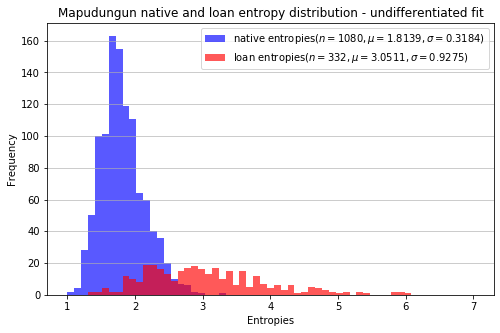

prob (stat >= 0.7151606425702811 ) = 0.0004995004995005381


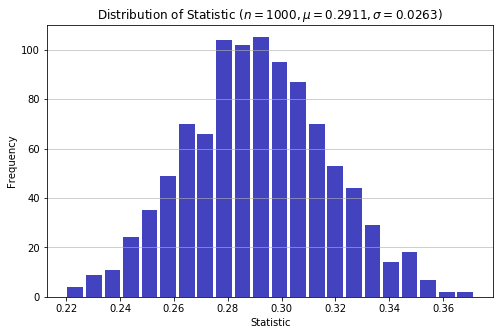

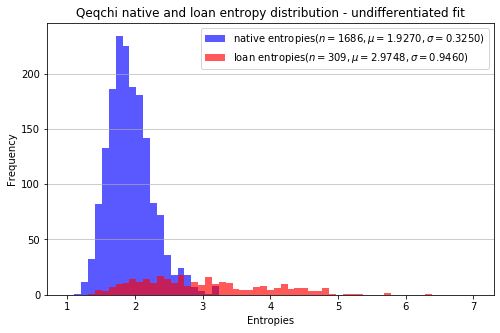

prob (stat >= 0.6168676363887641 ) = 0.0004995004995005381


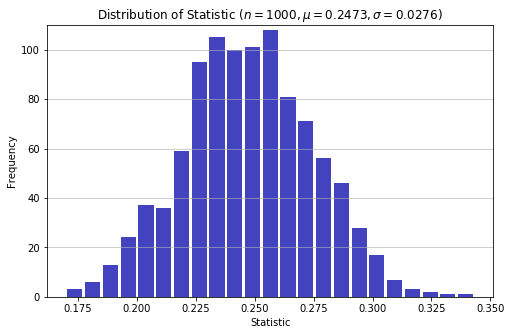

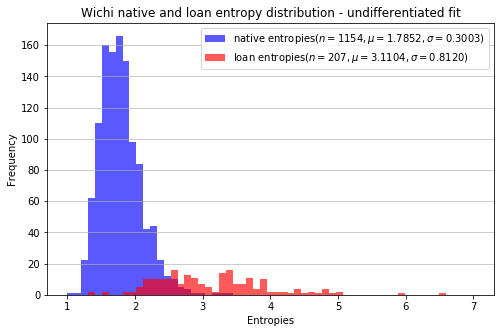

prob (stat >= 0.8197155033113137 ) = 0.0004995004995005381


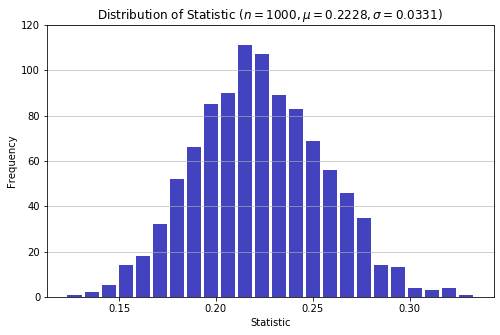

In [9]:
# Test for distributional differences - Based on formchars
# Based on native table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions_native_basis(l, form='formchars', test='ks', n=1000)

# More than 1000 replicates would be costly in time.

Language=English, form=segments


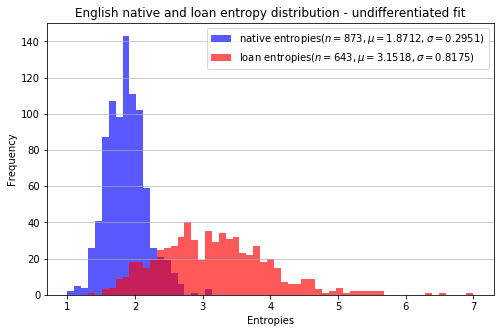

prob (stat >= 0.7809184824143699 ) = 0.0004995004995005381


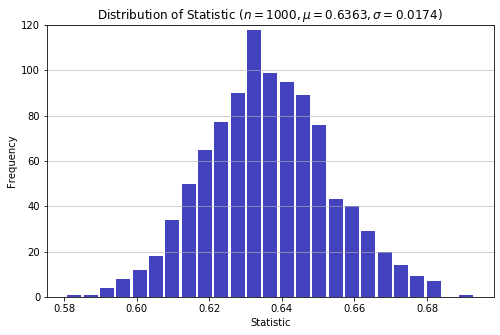

Language=Hup, form=segments


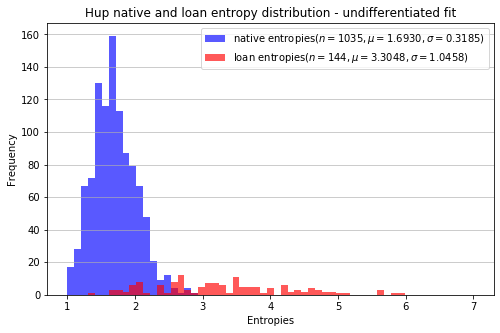

prob (stat >= 0.806280193236715 ) = 0.0004995004995005381


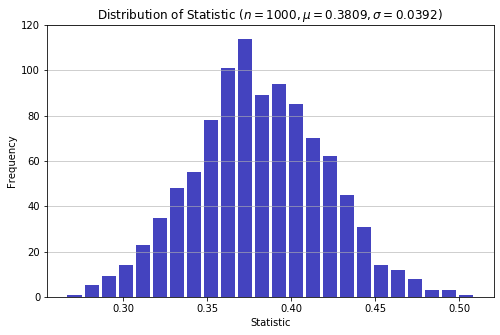

Language=ImbaburaQuechua, form=segments


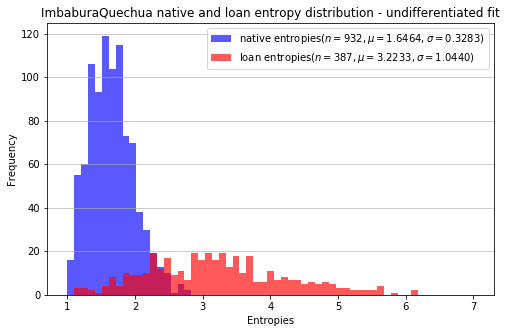

prob (stat >= 0.7866276297257433 ) = 0.0004995004995005381


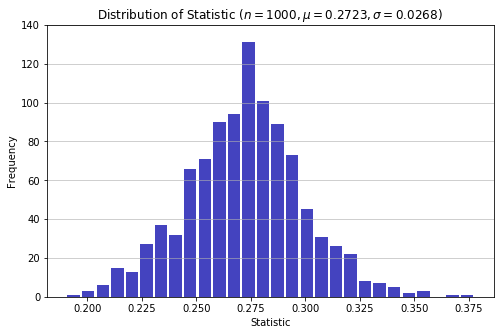

Language=Mapudungun, form=segments


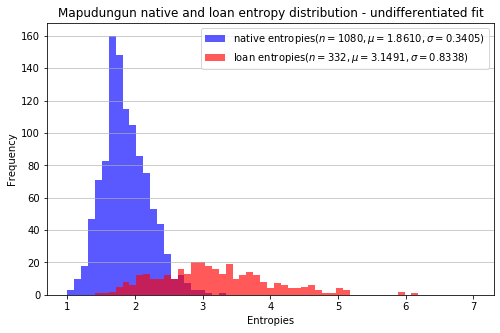

prob (stat >= 0.7396251673360107 ) = 0.0004995004995005381


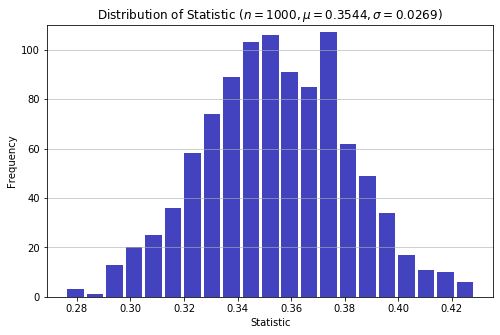

Language=Qeqchi, form=segments


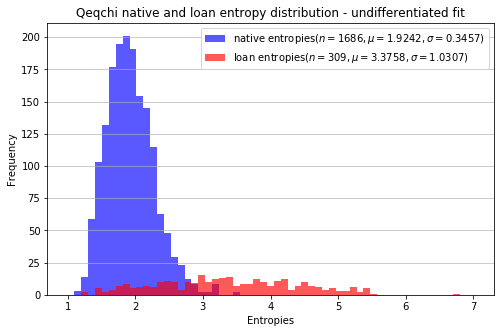

prob (stat >= 0.7226214743921962 ) = 0.0004995004995005381


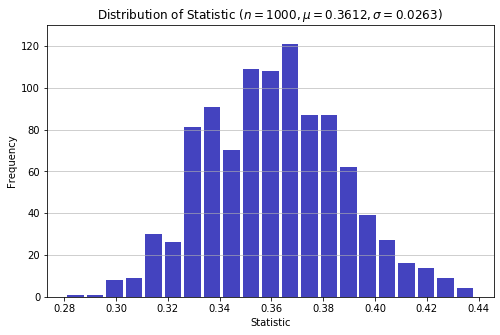

Language=Wichi, form=segments


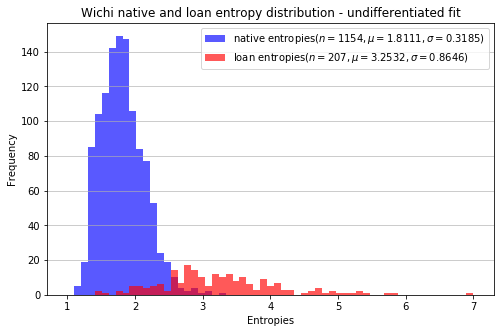

prob (stat >= 0.8293354766868444 ) = 0.0004995004995005381


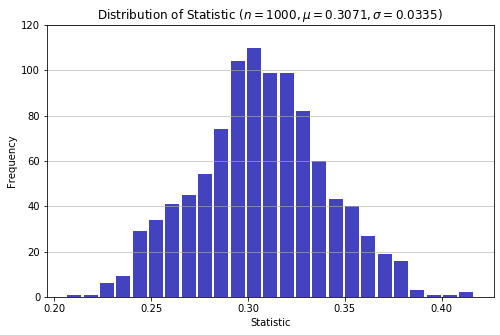

In [12]:
# Test for distributional differences - Based on segmented IPA (segments).
# Based on native table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions_native_basis(l, form='segments', test='ks', n=1000)

Language=English, form=scas


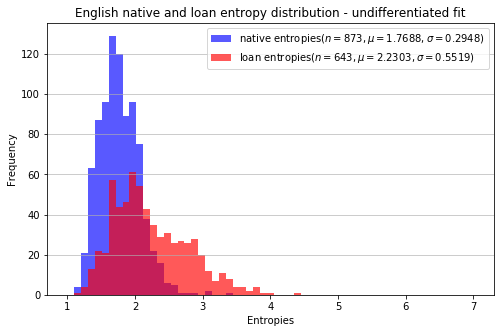

prob (stat >= 0.4050778584776757 ) = 0.0004995004995005381


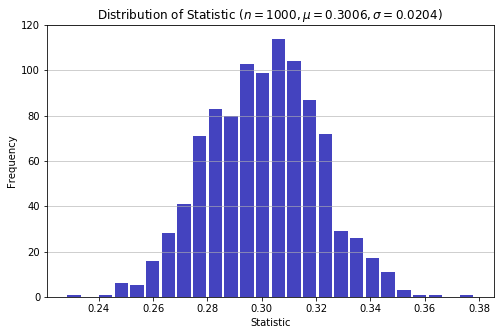

Language=Hup, form=scas


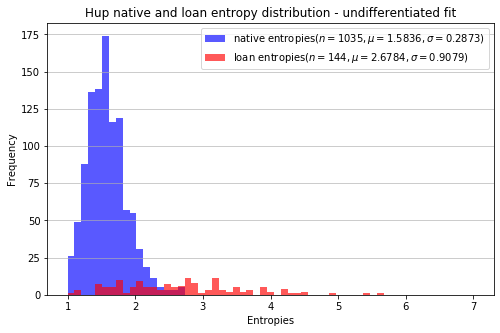

prob (stat >= 0.668659420289855 ) = 0.0004995004995005381


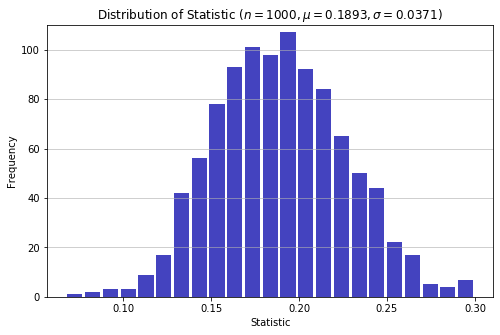

Language=ImbaburaQuechua, form=scas


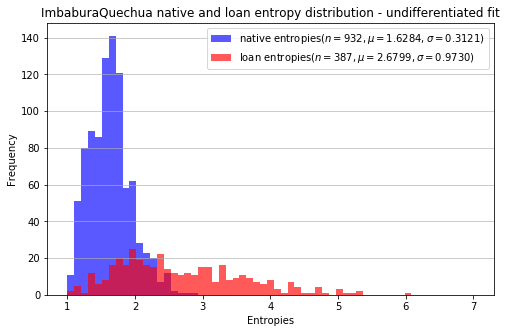

prob (stat >= 0.6270364086014351 ) = 0.0004995004995005381


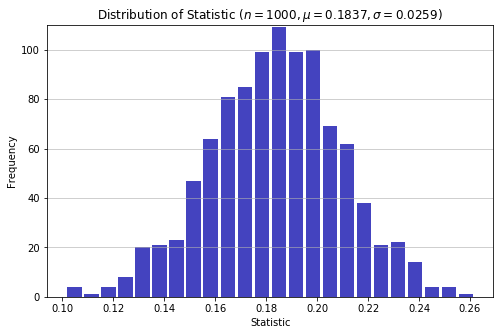

Language=Mapudungun, form=scas


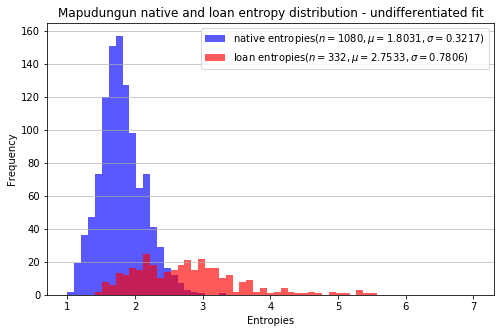

prob (stat >= 0.6231369924141008 ) = 0.0004995004995005381


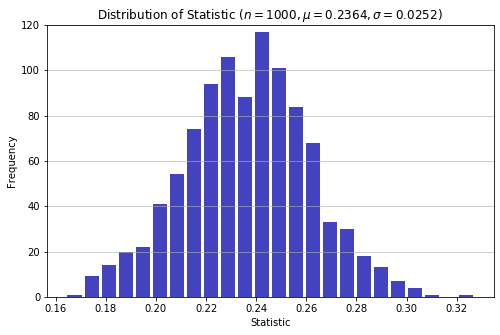

Language=Qeqchi, form=scas


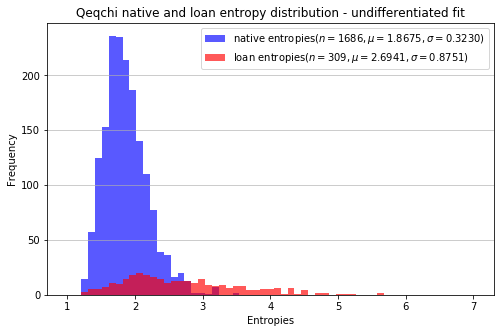

prob (stat >= 0.5182945790001037 ) = 0.0004995004995005381


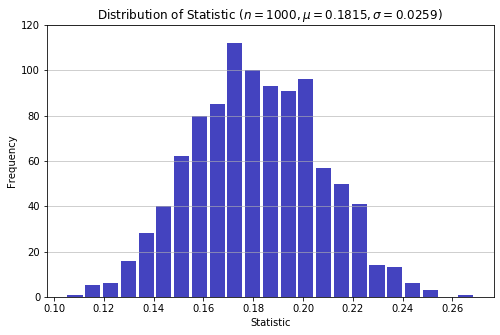

Language=Wichi, form=scas


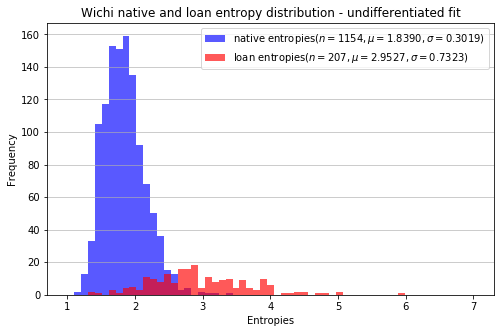

prob (stat >= 0.7517142641850652 ) = 0.0004995004995005381


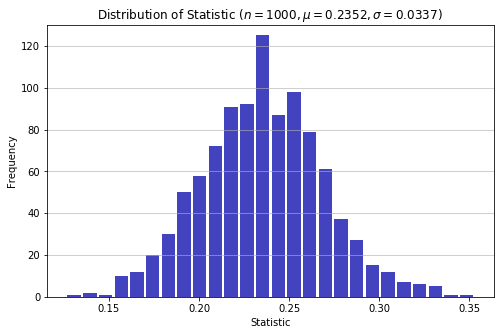

In [13]:
# Test for distributional differences - Based on segmented IPA (segments).
# Based on native table for training 2nd order Markov model, and
# Calcalulation and plotting of entropies for native and loan words separately.
for l in languages:
    analyze_language_word_distributions_native_basis(l, form='scas', test='ks', n=1000)

# Word discrimination - based on native versus loan entropy models

In [7]:
# Illustration of one trial.  Below we do k_fold trials.
language_word_discrimination_dual_basis("Hup", smoothing=0.5)
language_word_discrimination_dual_basis("Hup", form='segments', smoothing=0.5)
language_word_discrimination_dual_basis("Hup", form='scas', smoothing=0.5)


Language=Hup, form=formchars
num train=  944, num test=  235

* TRAIN RESULTS *
precision, recall, F1 = (1.0, 0.9867947178871549, 0.9933534743202418)
n = 944  accuracy = 0.9883474576271186
confusion matrix: tn, fp, fn, tp [111   0  11 822]
Predict majority: accuracy= 0.8824152542372882

* TEST RESULTS *
precision, recall, F1 = (0.9528795811518325, 0.900990099009901, 0.926208651399491)
n = 235  accuracy = 0.8765957446808511
confusion matrix: tn, fp, fn, tp [ 24   9  20 182]
Predict majority: accuracy= 0.8595744680851064

Language=Hup, form=segments
num train=  944, num test=  235

* TRAIN RESULTS *
precision, recall, F1 = (0.9975550122249389, 0.9855072463768116, 0.991494532199271)
n = 944  accuracy = 0.9851694915254238
confusion matrix: tn, fp, fn, tp [114   2  12 816]
Predict majority: accuracy= 0.8771186440677966

* TEST RESULTS *
precision, recall, F1 = (0.9637305699481865, 0.8985507246376812, 0.93)
n = 235  accuracy = 0.8808510638297873
confusion matrix: tn, fp, fn, tp [ 21   7  21

# Word discrimination - based on just native known  

In [8]:
# Illustration of one trial.  Below we do k_fold trials.
language_word_discrimination_native_basis("Qeqchi", smoothing=0.5, p=.995)
language_word_discrimination_native_basis("Qeqchi", form='segments', smoothing=0.5, p=.995)
language_word_discrimination_native_basis("Qeqchi", form='scas', smoothing=0.5, p=.995)


Language=Qeqchi, form=formchars
num train= 1596, num test=  399
Native avg=2.752, stdev=0.449
fraction 0.995, idx 1342.25, ref limit=4.453

* TRAIN RESULTS *
precision, recall, F1 = (0.9018157363819771, 0.9933333333333333, 0.9453648219950652)
n = 1596  accuracy = 0.9028822055137845
confusion matrix: tn, fp, fn, tp [ 100  146    9 1341]
Predict majority: accuracy= 0.8458646616541353

* TEST RESULTS *
precision, recall, F1 = (0.8962536023054755, 0.9255952380952381, 0.9106881405563689)
n = 399  accuracy = 0.8471177944862155
confusion matrix: tn, fp, fn, tp [ 27  36  25 311]
Predict majority: accuracy= 0.8421052631578947

Language=Qeqchi, form=segments
num train= 1596, num test=  399
Native avg=2.743, stdev=0.496
fraction 0.995, idx 1333.30, ref limit=4.412

* TRAIN RESULTS *
precision, recall, F1 = (0.9295184926727146, 0.9932885906040269, 0.9603460706560923)
n = 1596  accuracy = 0.931077694235589
confusion matrix: tn, fp, fn, tp [ 154  101    9 1332]
Predict majority: accuracy= 0.8402255

# Word discrimination - based on native only entropy model    
## k-fold fit on known native and loan and validation on unknown  

In [15]:
# Test k-fold native basis word discrimination - Based on formchars.
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_native_basis(l, form='formchars', smoothing=0.5, k_fold=10, p=.995)


English
Native avg=2.622, stdev=0.419
fraction 0.995, idx 778.09, ref limit=3.986

* TRAIN RESULTS *
precision, recall, F1 = (0.7239776951672863, 0.9948914431673053, 0.8380849919311458)
n = 1364  accuracy = 0.7793255131964809
confusion matrix: tn, fp, fn, tp [284 297   4 779]
Predict majority: accuracy= 0.5740469208211144

* TEST RESULTS *
precision, recall, F1 = (0.7087378640776699, 0.8111111111111111, 0.756476683937824)
n = 152  accuracy = 0.6907894736842105
confusion matrix: tn, fp, fn, tp [32 30 17 73]
Predict majority: accuracy= 0.5921052631578947
Native avg=2.642, stdev=0.417
fraction 0.995, idx 784.06, ref limit=4.086

* TRAIN RESULTS *
precision, recall, F1 = (0.714936247723133, 0.9949302915082383, 0.8320084790673026)
n = 1364  accuracy = 0.7675953079178885
confusion matrix: tn, fp, fn, tp [262 313   4 785]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.6542056074766355, 0.8333333333333334, 0.7329842931937172)
n = 152  accuracy = 0.

Native avg=2.428, stdev=0.470
fraction 0.995, idx 929.33, ref limit=3.884

* TRAIN RESULTS *
precision, recall, F1 = (0.9789473684210527, 0.9946524064171123, 0.9867374005305041)
n = 1061  accuracy = 0.9764373232799246
confusion matrix: tn, fp, fn, tp [106  20   5 930]
Predict majority: accuracy= 0.88124410933082

* TEST RESULTS *
precision, recall, F1 = (0.9871794871794872, 0.77, 0.8651685393258428)
n = 118  accuracy = 0.7966101694915254
confusion matrix: tn, fp, fn, tp [17  1 23 77]
Predict majority: accuracy= 0.847457627118644
Native avg=2.426, stdev=0.457
fraction 0.995, idx 925.35, ref limit=3.877

* TRAIN RESULTS *
precision, recall, F1 = (0.9819724284199364, 0.9946294307196563, 0.9882604055496265)
n = 1061  accuracy = 0.9792648444863337
confusion matrix: tn, fp, fn, tp [113  17   5 926]
Predict majority: accuracy= 0.8774740810556079

* TEST RESULTS *
precision, recall, F1 = (0.958904109589041, 0.6730769230769231, 0.7909604519774011)
n = 118  accuracy = 0.6864406779661016
confusio

Native avg=2.599, stdev=0.449
fraction 0.995, idx 969.13, ref limit=4.019

* TRAIN RESULTS *
precision, recall, F1 = (0.885036496350365, 0.9948717948717949, 0.9367455335586673)
n = 1270  accuracy = 0.8968503937007875
confusion matrix: tn, fp, fn, tp [169 126   5 970]
Predict majority: accuracy= 0.7677165354330708

* TEST RESULTS *
precision, recall, F1 = (0.8378378378378378, 0.8857142857142857, 0.8611111111111112)
n = 142  accuracy = 0.7887323943661971
confusion matrix: tn, fp, fn, tp [19 18 12 93]
Predict majority: accuracy= 0.7394366197183099
Native avg=2.609, stdev=0.455
fraction 0.995, idx 959.18, ref limit=3.982

* TRAIN RESULTS *
precision, recall, F1 = (0.8799266727772685, 0.9948186528497409, 0.933852140077821)
n = 1270  accuracy = 0.8929133858267716
confusion matrix: tn, fp, fn, tp [174 131   5 960]
Predict majority: accuracy= 0.7598425196850394

* TEST RESULTS *
precision, recall, F1 = (0.9122807017543859, 0.9043478260869565, 0.9082969432314411)
n = 142  accuracy = 0.852112676

Native avg=2.763, stdev=0.461
fraction 0.995, idx 1506.43, ref limit=4.327

* TRAIN RESULTS *
precision, recall, F1 = (0.9055923030667469, 0.994059405940594, 0.9477658904971681)
n = 1796  accuracy = 0.9075723830734966
confusion matrix: tn, fp, fn, tp [ 124  157    9 1506]
Predict majority: accuracy= 0.8435412026726058

* TEST RESULTS *
precision, recall, F1 = (0.9207317073170732, 0.8830409356725146, 0.9014925373134329)
n = 199  accuracy = 0.8341708542713567
confusion matrix: tn, fp, fn, tp [ 15  13  20 151]
Predict majority: accuracy= 0.8592964824120602
Native avg=2.767, stdev=0.462
fraction 0.995, idx 1518.37, ref limit=4.446

* TRAIN RESULTS *
precision, recall, F1 = (0.9074074074074074, 0.9947609692206941, 0.9490784129959386)
n = 1796  accuracy = 0.9092427616926503
confusion matrix: tn, fp, fn, tp [ 114  155    8 1519]
Predict majority: accuracy= 0.8502227171492205

* TEST RESULTS *
precision, recall, F1 = (0.8421052631578947, 0.9056603773584906, 0.8727272727272727)
n = 199  accurac

In [16]:
# Test k-fold native basis word discrimination - Based on segmented IPA (segments).
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_native_basis(l, form='segments', smoothing=0.5, k_fold=10, p=.995)


English
Native avg=2.683, stdev=0.414
fraction 0.995, idx 784.06, ref limit=3.949

* TRAIN RESULTS *
precision, recall, F1 = (0.8151609553478713, 0.9949302915082383, 0.8961187214611872)
n = 1364  accuracy = 0.8665689149560117
confusion matrix: tn, fp, fn, tp [397 178   4 785]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.6219512195121951, 0.6071428571428571, 0.6144578313253012)
n = 152  accuracy = 0.5789473684210527
confusion matrix: tn, fp, fn, tp [37 31 33 51]
Predict majority: accuracy= 0.5526315789473685
Native avg=2.680, stdev=0.424
fraction 0.995, idx 778.09, ref limit=3.990

* TRAIN RESULTS *
precision, recall, F1 = (0.798155737704918, 0.9948914431673053, 0.885730528709494)
n = 1364  accuracy = 0.8526392961876833
confusion matrix: tn, fp, fn, tp [384 197   4 779]
Predict majority: accuracy= 0.5740469208211144

* TEST RESULTS *
precision, recall, F1 = (0.7532467532467533, 0.6444444444444445, 0.6946107784431139)
n = 152  accuracy = 0.

Native avg=2.433, stdev=0.456
fraction 0.995, idx 924.36, ref limit=3.852

* TRAIN RESULTS *
precision, recall, F1 = (0.9575569358178054, 0.9946236559139785, 0.9757383966244727)
n = 1061  accuracy = 0.9566446748350612
confusion matrix: tn, fp, fn, tp [ 90  41   5 925]
Predict majority: accuracy= 0.8765315739868049

* TEST RESULTS *
precision, recall, F1 = (0.963855421686747, 0.7619047619047619, 0.8510638297872339)
n = 118  accuracy = 0.7627118644067796
confusion matrix: tn, fp, fn, tp [10  3 25 80]
Predict majority: accuracy= 0.8898305084745762
Native avg=2.433, stdev=0.454
fraction 0.995, idx 921.37, ref limit=3.882

* TRAIN RESULTS *
precision, recall, F1 = (0.953464322647363, 0.9946062567421791, 0.9736008447729673)
n = 1061  accuracy = 0.9528746465598492
confusion matrix: tn, fp, fn, tp [ 89  45   5 922]
Predict majority: accuracy= 0.8737040527803959

* TEST RESULTS *
precision, recall, F1 = (0.9425287356321839, 0.7592592592592593, 0.841025641025641)
n = 118  accuracy = 0.7372881355

Native avg=2.660, stdev=0.490
fraction 0.995, idx 966.14, ref limit=4.181

* TRAIN RESULTS *
precision, recall, F1 = (0.8945420906567992, 0.9948559670781894, 0.9420360448124696)
n = 1270  accuracy = 0.9062992125984252
confusion matrix: tn, fp, fn, tp [184 114   5 967]
Predict majority: accuracy= 0.7653543307086614

* TEST RESULTS *
precision, recall, F1 = (0.8627450980392157, 0.8148148148148148, 0.838095238095238)
n = 142  accuracy = 0.7605633802816901
confusion matrix: tn, fp, fn, tp [20 14 20 88]
Predict majority: accuracy= 0.7605633802816901
Native avg=2.671, stdev=0.488
fraction 0.995, idx 963.16, ref limit=4.149

* TRAIN RESULTS *
precision, recall, F1 = (0.8917668825161887, 0.9948400412796697, 0.9404878048780487)
n = 1270  accuracy = 0.9039370078740158
confusion matrix: tn, fp, fn, tp [184 117   5 964]
Predict majority: accuracy= 0.7629921259842519

* TEST RESULTS *
precision, recall, F1 = (0.8857142857142857, 0.8378378378378378, 0.8611111111111112)
n = 142  accuracy = 0.78873239

Native avg=2.759, stdev=0.497
fraction 0.995, idx 1511.40, ref limit=4.506

* TRAIN RESULTS *
precision, recall, F1 = (0.9287031346035648, 0.9940789473684211, 0.9602796313949793)
n = 1796  accuracy = 0.9304008908685969
confusion matrix: tn, fp, fn, tp [ 160  116    9 1511]
Predict majority: accuracy= 0.8463251670378619

* TEST RESULTS *
precision, recall, F1 = (0.9113924050632911, 0.8674698795180723, 0.8888888888888888)
n = 199  accuracy = 0.8190954773869347
confusion matrix: tn, fp, fn, tp [ 19  14  22 144]
Predict majority: accuracy= 0.8341708542713567
Native avg=2.756, stdev=0.505
fraction 0.995, idx 1504.44, ref limit=4.500

* TRAIN RESULTS *
precision, recall, F1 = (0.9266789895255699, 0.9940515532055518, 0.9591836734693878)
n = 1796  accuracy = 0.9287305122494433
confusion matrix: tn, fp, fn, tp [ 164  119    9 1504]
Predict majority: accuracy= 0.8424276169265034

* TEST RESULTS *
precision, recall, F1 = (0.9254658385093167, 0.861271676300578, 0.8922155688622754)
n = 199  accurac

In [9]:
# Test k-fold native basis word discrimination - Based on segmented IPA (segments).
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_native_basis(l, form='scas', smoothing=0.5, k_fold=10, p=.995)


Language=English, form=scas
Native avg=2.547, stdev=0.422
fraction 0.995, idx 782.07, ref limit=4.002

* TRAIN RESULTS *
precision, recall, F1 = (0.6264, 0.9949174078780177, 0.7687776141384388)
n = 1364  accuracy = 0.6546920821114369
confusion matrix: tn, fp, fn, tp [110 467   4 783]
Predict majority: accuracy= 0.5769794721407625

* TEST RESULTS *
precision, recall, F1 = (0.5905511811023622, 0.872093023255814, 0.7042253521126759)
n = 152  accuracy = 0.5855263157894737
confusion matrix: tn, fp, fn, tp [14 52 11 75]
Predict majority: accuracy= 0.5657894736842105
Native avg=2.534, stdev=0.420
fraction 0.995, idx 785.05, ref limit=4.062

* TRAIN RESULTS *
precision, recall, F1 = (0.6233148295003965, 0.9949367088607595, 0.7664553876157972)
n = 1364  accuracy = 0.6488269794721407
confusion matrix: tn, fp, fn, tp [ 99 475   4 786]
Predict majority: accuracy= 0.5791788856304986

* TEST RESULTS *
precision, recall, F1 = (0.556390977443609, 0.891566265060241, 0.6851851851851851)
n = 152  accura

Native avg=2.268, stdev=0.414
fraction 0.995, idx 923.36, ref limit=3.725

* TRAIN RESULTS *
precision, recall, F1 = (0.9371196754563894, 0.9946178686759957, 0.9650130548302872)
n = 1061  accuracy = 0.9368520263901979
confusion matrix: tn, fp, fn, tp [ 70  62   5 924]
Predict majority: accuracy= 0.8755890669180019

* TEST RESULTS *
precision, recall, F1 = (0.96, 0.9056603773584906, 0.9320388349514563)
n = 118  accuracy = 0.8813559322033898
confusion matrix: tn, fp, fn, tp [ 8  4 10 96]
Predict majority: accuracy= 0.8983050847457628
Native avg=2.274, stdev=0.408
fraction 0.995, idx 925.35, ref limit=3.676

* TRAIN RESULTS *
precision, recall, F1 = (0.9381965552178319, 0.9946294307196563, 0.9655891553701773)
n = 1061  accuracy = 0.937794533459001
confusion matrix: tn, fp, fn, tp [ 69  61   5 926]
Predict majority: accuracy= 0.8774740810556079

* TEST RESULTS *
precision, recall, F1 = (0.9519230769230769, 0.9519230769230769, 0.9519230769230769)
n = 118  accuracy = 0.9152542372881356
confu

Native avg=2.594, stdev=0.459
fraction 0.995, idx 959.18, ref limit=3.907

* TRAIN RESULTS *
precision, recall, F1 = (0.8617594254937163, 0.9948186528497409, 0.9235209235209234)
n = 1270  accuracy = 0.8748031496062992
confusion matrix: tn, fp, fn, tp [151 154   5 960]
Predict majority: accuracy= 0.7598425196850394

* TEST RESULTS *
precision, recall, F1 = (0.8559322033898306, 0.8782608695652174, 0.8669527896995708)
n = 142  accuracy = 0.7816901408450704
confusion matrix: tn, fp, fn, tp [ 10  17  14 101]
Predict majority: accuracy= 0.8098591549295775
Native avg=2.596, stdev=0.462
fraction 0.995, idx 963.16, ref limit=3.920

* TRAIN RESULTS *
precision, recall, F1 = (0.8546099290780141, 0.9948400412796697, 0.9194086790653314)
n = 1270  accuracy = 0.8669291338582678
confusion matrix: tn, fp, fn, tp [137 164   5 964]
Predict majority: accuracy= 0.7629921259842519

* TEST RESULTS *
precision, recall, F1 = (0.8888888888888888, 0.9369369369369369, 0.9122807017543859)
n = 142  accuracy = 0.859

Native avg=2.686, stdev=0.466
fraction 0.995, idx 1505.43, ref limit=4.370

* TRAIN RESULTS *
precision, recall, F1 = (0.8843217850851439, 0.9947159841479525, 0.9362760335716506)
n = 1796  accuracy = 0.8858574610244989
confusion matrix: tn, fp, fn, tp [  85  197    8 1506]
Predict majority: accuracy= 0.8429844097995546

* TEST RESULTS *
precision, recall, F1 = (0.9116022099447514, 0.9593023255813954, 0.934844192634561)
n = 199  accuracy = 0.8844221105527639
confusion matrix: tn, fp, fn, tp [ 11  16   7 165]
Predict majority: accuracy= 0.864321608040201
Native avg=2.683, stdev=0.461
fraction 0.995, idx 1512.40, ref limit=4.507

* TRAIN RESULTS *
precision, recall, F1 = (0.8858313817330211, 0.9947403024326101, 0.9371322390833076)
n = 1796  accuracy = 0.8869710467706013
confusion matrix: tn, fp, fn, tp [  80  195    8 1513]
Predict majority: accuracy= 0.8468819599109132

* TEST RESULTS *
precision, recall, F1 = (0.8579234972677595, 0.9515151515151515, 0.9022988505747126)
n = 199  accuracy

# Word discrimination - based on native and loan entropy models    
## k-fold fit on known native and loan and validation on unknown  

In [17]:
# Test k_fold dual basis word discrimination - Based on formchars.
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_dual_basis(l, form='formchars', smoothing=0.5, k_fold=10)


English

* TRAIN RESULTS *
precision, recall, F1 = (0.9487836107554417, 0.9391634980988594, 0.9439490445859873)
n = 1364  accuracy = 0.9354838709677419
confusion matrix: tn, fp, fn, tp [535  40  48 741]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.7804878048780488, 0.7619047619047619, 0.7710843373493976)
n = 152  accuracy = 0.75
confusion matrix: tn, fp, fn, tp [50 18 20 64]
Predict majority: accuracy= 0.5526315789473685

* TRAIN RESULTS *
precision, recall, F1 = (0.9403553299492385, 0.9403553299492385, 0.9403553299492385)
n = 1364  accuracy = 0.9310850439882697
confusion matrix: tn, fp, fn, tp [529  47  47 741]
Predict majority: accuracy= 0.5777126099706745

* TEST RESULTS *
precision, recall, F1 = (0.8414634146341463, 0.8117647058823529, 0.8263473053892215)
n = 152  accuracy = 0.8092105263157895
confusion matrix: tn, fp, fn, tp [54 13 16 69]
Predict majority: accuracy= 0.5592105263157895

* TRAIN RESULTS *
precision, recall, F1 = (0.947


* TRAIN RESULTS *
precision, recall, F1 = (0.998914223669924, 0.9924487594390508, 0.9956709956709957)
n = 1061  accuracy = 0.9924599434495759
confusion matrix: tn, fp, fn, tp [133   1   7 920]
Predict majority: accuracy= 0.8737040527803959

* TEST RESULTS *
precision, recall, F1 = (0.9716981132075472, 0.9537037037037037, 0.9626168224299064)
n = 118  accuracy = 0.9322033898305084
confusion matrix: tn, fp, fn, tp [  7   3   5 103]
Predict majority: accuracy= 0.9152542372881356

* TRAIN RESULTS *
precision, recall, F1 = (1.0, 0.9871106337271751, 0.9935135135135136)
n = 1062  accuracy = 0.9887005649717514
confusion matrix: tn, fp, fn, tp [131   0  12 919]
Predict majority: accuracy= 0.876647834274953

* TEST RESULTS *
precision, recall, F1 = (0.9693877551020408, 0.9134615384615384, 0.9405940594059407)
n = 117  accuracy = 0.8974358974358975
confusion matrix: tn, fp, fn, tp [10  3  9 95]
Predict majority: accuracy= 0.8888888888888888

            Acc   Maj_acc      Prec    Recall        F1



* TRAIN RESULTS *
precision, recall, F1 = (0.9935965848452508, 0.9519427402862985, 0.9723237597911227)
n = 1271  accuracy = 0.9583005507474429
confusion matrix: tn, fp, fn, tp [287   6  47 931]
Predict majority: accuracy= 0.7694728560188828

* TEST RESULTS *
precision, recall, F1 = (0.9306930693069307, 0.9215686274509803, 0.9261083743842364)
n = 141  accuracy = 0.8936170212765957
confusion matrix: tn, fp, fn, tp [32  7  8 94]
Predict majority: accuracy= 0.723404255319149

* TRAIN RESULTS *
precision, recall, F1 = (0.9978260869565218, 0.9483471074380165, 0.9724576271186441)
n = 1271  accuracy = 0.959087332808812
confusion matrix: tn, fp, fn, tp [301   2  50 918]
Predict majority: accuracy= 0.7616050354051928

* TEST RESULTS *
precision, recall, F1 = (0.9805825242718447, 0.9017857142857143, 0.9395348837209301)
n = 141  accuracy = 0.9078014184397163
confusion matrix: tn, fp, fn, tp [ 27   2  11 101]
Predict majority: accuracy= 0.7943262411347518

* TRAIN RESULTS *
precision, recall, F1 =


* TRAIN RESULTS *
precision, recall, F1 = (0.9931305201177625, 0.9758919961427194, 0.9844357976653696)
n = 1225  accuracy = 0.9738775510204082
confusion matrix: tn, fp, fn, tp [ 181    7   25 1012]
Predict majority: accuracy= 0.846530612244898

* TEST RESULTS *
precision, recall, F1 = (0.9734513274336283, 0.9401709401709402, 0.9565217391304347)
n = 136  accuracy = 0.9264705882352942
confusion matrix: tn, fp, fn, tp [ 16   3   7 110]
Predict majority: accuracy= 0.8602941176470589

* TRAIN RESULTS *
precision, recall, F1 = (0.9950738916256158, 0.9730250481695568, 0.9839259620068193)
n = 1225  accuracy = 0.9730612244897959
confusion matrix: tn, fp, fn, tp [ 182    5   28 1010]
Predict majority: accuracy= 0.8473469387755102

* TEST RESULTS *
precision, recall, F1 = (0.9636363636363636, 0.9137931034482759, 0.9380530973451328)
n = 136  accuracy = 0.8970588235294118
confusion matrix: tn, fp, fn, tp [ 16   4  10 106]
Predict majority: accuracy= 0.8529411764705882

* TRAIN RESULTS *
precision,

In [18]:
# Test k_fold dual basis word discrimination - Based on segmented IPA (segments).
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_dual_basis(l, form='segments', smoothing=0.5, k_fold=10)


English

* TRAIN RESULTS *
precision, recall, F1 = (0.9734177215189873, 0.9746514575411914, 0.9740341988600381)
n = 1364  accuracy = 0.9699413489736071
confusion matrix: tn, fp, fn, tp [554  21  20 769]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.7558139534883721, 0.7738095238095238, 0.7647058823529412)
n = 152  accuracy = 0.7368421052631579
confusion matrix: tn, fp, fn, tp [47 21 19 65]
Predict majority: accuracy= 0.5526315789473685

* TRAIN RESULTS *
precision, recall, F1 = (0.9720812182741116, 0.9782886334610472, 0.9751750477402928)
n = 1364  accuracy = 0.9714076246334311
confusion matrix: tn, fp, fn, tp [559  22  17 766]
Predict majority: accuracy= 0.5740469208211144

* TEST RESULTS *
precision, recall, F1 = (0.7530864197530864, 0.6777777777777778, 0.7134502923976608)
n = 152  accuracy = 0.6776315789473685
confusion matrix: tn, fp, fn, tp [42 20 29 61]
Predict majority: accuracy= 0.5921052631578947

* TRAIN RESULTS *
precision, recal


* TRAIN RESULTS *
precision, recall, F1 = (0.9989071038251366, 0.9785867237687366, 0.9886425094645753)
n = 1061  accuracy = 0.9802073515551367
confusion matrix: tn, fp, fn, tp [126   1  20 914]
Predict majority: accuracy= 0.8803016022620169

* TEST RESULTS *
precision, recall, F1 = (0.9655172413793104, 0.8316831683168316, 0.8936170212765958)
n = 118  accuracy = 0.8305084745762712
confusion matrix: tn, fp, fn, tp [14  3 17 84]
Predict majority: accuracy= 0.8559322033898306

* TRAIN RESULTS *
precision, recall, F1 = (1.0, 0.9796791443850268, 0.9897352782279849)
n = 1062  accuracy = 0.9821092278719398
confusion matrix: tn, fp, fn, tp [127   0  19 916]
Predict majority: accuracy= 0.8804143126177024

* TEST RESULTS *
precision, recall, F1 = (0.9479166666666666, 0.91, 0.9285714285714285)
n = 117  accuracy = 0.8803418803418803
confusion matrix: tn, fp, fn, tp [12  5  9 91]
Predict majority: accuracy= 0.8547008547008547

            Acc   Maj_acc      Prec    Recall        F1
Mean   0.890577 


* TRAIN RESULTS *
precision, recall, F1 = (0.996822033898305, 0.9592252803261978, 0.9776623376623378)
n = 1271  accuracy = 0.966168371361133
confusion matrix: tn, fp, fn, tp [287   3  40 941]
Predict majority: accuracy= 0.7718332022029898

* TEST RESULTS *
precision, recall, F1 = (0.9247311827956989, 0.8686868686868687, 0.8958333333333334)
n = 141  accuracy = 0.8581560283687943
confusion matrix: tn, fp, fn, tp [35  7 13 86]
Predict majority: accuracy= 0.7021276595744681

* TRAIN RESULTS *
precision, recall, F1 = (0.9978813559322034, 0.9612244897959183, 0.9792099792099791)
n = 1271  accuracy = 0.96852871754524
confusion matrix: tn, fp, fn, tp [289   2  38 942]
Predict majority: accuracy= 0.7710464201416207

* TEST RESULTS *
precision, recall, F1 = (0.9651162790697675, 0.83, 0.8924731182795699)
n = 141  accuracy = 0.8581560283687943
confusion matrix: tn, fp, fn, tp [38  3 17 83]
Predict majority: accuracy= 0.7092198581560284

* TRAIN RESULTS *
precision, recall, F1 = (0.9956989247311828


* TRAIN RESULTS *
precision, recall, F1 = (0.9980449657869013, 0.9760994263862333, 0.9869502174963751)
n = 1225  accuracy = 0.9779591836734693
confusion matrix: tn, fp, fn, tp [ 177    2   25 1021]
Predict majority: accuracy= 0.8538775510204082

* TEST RESULTS *
precision, recall, F1 = (0.9626168224299065, 0.9537037037037037, 0.958139534883721)
n = 136  accuracy = 0.9338235294117647
confusion matrix: tn, fp, fn, tp [ 24   4   5 103]
Predict majority: accuracy= 0.7941176470588235

* TRAIN RESULTS *
precision, recall, F1 = (0.9960552268244576, 0.974903474903475, 0.9853658536585366)
n = 1225  accuracy = 0.9755102040816327
confusion matrix: tn, fp, fn, tp [ 185    4   26 1010]
Predict majority: accuracy= 0.8457142857142858

* TEST RESULTS *
precision, recall, F1 = (1.0, 0.864406779661017, 0.9272727272727274)
n = 136  accuracy = 0.8823529411764706
confusion matrix: tn, fp, fn, tp [ 18   0  16 102]
Predict majority: accuracy= 0.8676470588235294

* TRAIN RESULTS *
precision, recall, F1 = (0.

In [10]:
# Test k_fold dual basis word discrimination - Based on segmented IPA (segments).
# No interest in return table of k-fold trials, thus the _ return value.
for l in languages:
    _ = k_fold_language_word_discrimination_dual_basis(l, form='scas', smoothing=0.5, k_fold=10)


Language=English, form=scas

* TRAIN RESULTS *
precision, recall, F1 = (0.8920377867746289, 0.8335435056746532, 0.8617992177314211)
n = 1364  accuracy = 0.844574780058651
confusion matrix: tn, fp, fn, tp [491  80 132 661]
Predict majority: accuracy= 0.5813782991202346

* TEST RESULTS *
precision, recall, F1 = (0.65, 0.65, 0.65)
n = 152  accuracy = 0.631578947368421
confusion matrix: tn, fp, fn, tp [44 28 28 52]
Predict majority: accuracy= 0.5263157894736842

* TRAIN RESULTS *
precision, recall, F1 = (0.9003931847968545, 0.870722433460076, 0.8853092783505154)
n = 1364  accuracy = 0.8695014662756598
confusion matrix: tn, fp, fn, tp [499  76 102 687]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.618421052631579, 0.5595238095238095, 0.5875)
n = 152  accuracy = 0.5657894736842105
confusion matrix: tn, fp, fn, tp [39 29 37 47]
Predict majority: accuracy= 0.5526315789473685

* TRAIN RESULTS *
precision, recall, F1 = (0.891566265060241, 0.84517766


* TRAIN RESULTS *
precision, recall, F1 = (0.9932659932659933, 0.9505907626208379, 0.9714599341383097)
n = 1061  accuracy = 0.9509896324222432
confusion matrix: tn, fp, fn, tp [124   6  46 885]
Predict majority: accuracy= 0.8774740810556079

* TEST RESULTS *
precision, recall, F1 = (0.9893617021276596, 0.8942307692307693, 0.9393939393939394)
n = 118  accuracy = 0.8983050847457628
confusion matrix: tn, fp, fn, tp [13  1 11 93]
Predict majority: accuracy= 0.8813559322033898

* TRAIN RESULTS *
precision, recall, F1 = (0.9887892376681614, 0.9504310344827587, 0.9692307692307692)
n = 1061  accuracy = 0.9472196041470311
confusion matrix: tn, fp, fn, tp [123  10  46 882]
Predict majority: accuracy= 0.8746465598491989

* TEST RESULTS *
precision, recall, F1 = (0.96, 0.897196261682243, 0.927536231884058)
n = 118  accuracy = 0.8728813559322034
confusion matrix: tn, fp, fn, tp [ 7  4 11 96]
Predict majority: accuracy= 0.9067796610169492

* TRAIN RESULTS *
precision, recall, F1 = (0.99, 0.95498392


* TRAIN RESULTS *
precision, recall, F1 = (0.9889867841409692, 0.9219712525667351, 0.9543039319872475)
n = 1271  accuracy = 0.932336742722266
confusion matrix: tn, fp, fn, tp [287  10  76 898]
Predict majority: accuracy= 0.7663257277734068

* TEST RESULTS *
precision, recall, F1 = (0.91, 0.8584905660377359, 0.883495145631068)
n = 141  accuracy = 0.8297872340425532
confusion matrix: tn, fp, fn, tp [26  9 15 91]
Predict majority: accuracy= 0.75177304964539

* TRAIN RESULTS *
precision, recall, F1 = (0.989010989010989, 0.9278350515463918, 0.9574468085106383)
n = 1271  accuracy = 0.9370574350904799
confusion matrix: tn, fp, fn, tp [291  10  70 900]
Predict majority: accuracy= 0.7631785995279308

* TEST RESULTS *
precision, recall, F1 = (0.8969072164948454, 0.7909090909090909, 0.8405797101449276)
n = 141  accuracy = 0.7659574468085106
confusion matrix: tn, fp, fn, tp [21 10 23 87]
Predict majority: accuracy= 0.7801418439716312

* TRAIN RESULTS *
precision, recall, F1 = (0.9867549668874173,


* TRAIN RESULTS *
precision, recall, F1 = (0.9939577039274925, 0.9508670520231214, 0.9719350073855244)
n = 1225  accuracy = 0.953469387755102
confusion matrix: tn, fp, fn, tp [181   6  51 987]
Predict majority: accuracy= 0.8473469387755102

* TEST RESULTS *
precision, recall, F1 = (0.972972972972973, 0.9310344827586207, 0.9515418502202643)
n = 136  accuracy = 0.9191176470588235
confusion matrix: tn, fp, fn, tp [ 17   3   8 108]
Predict majority: accuracy= 0.8529411764705882

* TRAIN RESULTS *
precision, recall, F1 = (0.9929859719438878, 0.9565637065637066, 0.9744346116027534)
n = 1225  accuracy = 0.9575510204081633
confusion matrix: tn, fp, fn, tp [182   7  45 991]
Predict majority: accuracy= 0.8457142857142858

* TEST RESULTS *
precision, recall, F1 = (0.972972972972973, 0.9152542372881356, 0.9432314410480349)
n = 136  accuracy = 0.9044117647058824
confusion matrix: tn, fp, fn, tp [ 15   3  10 108]
Predict majority: accuracy= 0.8676470588235294

* TRAIN RESULTS *
precision, recall, F

# Overfitting of Markov model  
## k-fold report of entropy mean and standard deviation  
- Table as argument -- allows selection of subset of language table  
- k-fold determines fit and validation fractions  
- Option to specify subset selector for validation study
    - Can look at only native words with this option.
- No need for randomization tests of differences  
    - Sufficient evidence in statistical description  

In [19]:
# Test k_fold - train versus val entropy studies - Based on formchars.
# Select native subset of table for native only study - increase k_fold to allow larger train set.
for l in languages:
    k_fold_entropy_for_language(l, k_fold=5, smoothing=[0.5])
    k_fold_entropy_for_language(l, k_fold=10, smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)


5-fold entropy for English.
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.838       0.411       3.372      0.757
StdDev         0.0037      0.0064      0.0381     0.0348
StdErr        0.00185     0.00319     0.01903    0.01741

10-fold entropy for English.
Subset selected: See sample and val sizes.
Sample=873, k-fold=10, val=88, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.631       0.422       3.272      0.826
StdDev         0.0062      0.0052      0.0889     0.0762
StdErr        0.00206     0.00174     0.02963    0.02540

5-fold entropy for Hup.
Sample=1179, k-fold=5, val=236, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.496       0.468       3.451      1.122
StdDev         0.0114      0.0056      0.0806     0.0409
StdErr        0.00569     0.00280     0.04030 

In [20]:
# Test k_fold - train versus val entropy studies - Based on segments.
# Select native subset of table for native only study - increase k_fold to allow larger train set.
for l in languages:
    k_fold_entropy_for_language(l, k_fold=5, form='segments', smoothing=[0.5])
    k_fold_entropy_for_language(l, k_fold=10, form='segments', smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)


5-fold entropy for English.
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.863       0.423       3.878      0.948
StdDev         0.0029      0.0069      0.0466     0.0592
StdErr        0.00144     0.00346     0.02328    0.02958

10-fold entropy for English.
Subset selected: See sample and val sizes.
Sample=873, k-fold=10, val=88, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.673       0.423       3.828      0.978
StdDev         0.0098      0.0048      0.1312     0.0841
StdErr        0.00325     0.00161     0.04372    0.02804

5-fold entropy for Hup.
Sample=1179, k-fold=5, val=236, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.503       0.466       3.312      1.080
StdDev         0.0096      0.0073      0.0953     0.1285
StdErr        0.00482     0.00367     0.04765 

In [11]:
# Test k_fold - train versus val entropy studies - Based on segments.
# Select native subset of table for native only study - increase k_fold to allow larger train set.
for l in languages:
    k_fold_entropy_for_language(l, k_fold=5, form='scas', smoothing=[0.5])
    k_fold_entropy_for_language(l, k_fold=10, form='scas', smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)


Language=English, form=scas - 5-fold entropy
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.651       0.429       3.007      0.728
StdDev         0.0070      0.0077      0.0425     0.0493
StdErr        0.00348     0.00384     0.02125    0.02467

Language=English, form=scas - 10-fold entropy
Subset selected: See sample and val sizes.
Sample=873, k-fold=10, val=88, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.538       0.422       2.992      0.758
StdDev         0.0034      0.0039      0.0585     0.0676
StdErr        0.00113     0.00129     0.01951    0.02254

Language=Hup, form=scas - 5-fold entropy
Sample=1179, k-fold=5, val=236, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.355       0.429       2.637      0.706
StdDev         0.0102      0.0096      0.0573     0.